# Масштабирование

**Масштабирование признаков**

Масштабированием называется общий процесс изменения диапазона признака. Это необходимый шаг, потому что признаки измеряются в разных единицах, а значит покрывают разные диапазоны.

*Например, столбцы возраста и месячной зарплаты будут иметь совершенно разный диапазон.*

Это сильно искажает результаты таких алгоритмов, как *метод опорных векторов* и *метод k-ближайших соседей*, которые учитывают расстояния между измерениями. А масштабирование позволяет этого избежать. И хотя методы вроде *линейной регрессии* и *«случайного леса»* не требует масштабирования признаков, лучше не пренебрегать этим этапом при сравнении нескольких алгоритмов.

**Существует два распространенных способа масштабирования:**

1. **Нормализация**

В данном случае все значения будут находиться в диапазоне от 0 до 1. Дискретные бинарные значения определяются как 0 и 1.

Расчёт нового значения происходит по формуле:

$X_{norm} = \frac{X-X_{min}}{X_{max}-X_{min}}$


2. **Стандартизация**

Масштабирует значения с учетом стандартного отклонения. Если стандартное отклонение функций другое, их диапазон также будет отличаться друг от друга. Это снижает влияние выбросов в элементах. В следующей формуле стандартизации среднее значение показано как $μ$, а стандартное отклонение показано как $σ$.

$X_{std} = \frac{X-μ}{σ}$

Стандартизация приводит все исходные значения набора данных, независимо от их начальных распределений и единиц измерения, к набору значений из распределения с **нулевым средним значением** и **единичным стандартным отклонением** (т.е. по сути приводит все к нормальному распределению).

Пакет `sklearn.preprocessing` содержит в себе множество различных функции предобработки данных, в том числе функции, позволяющие выполнять масштабирование признаков:

- **StandardScaler()** - класс для стандартизации
- **MinMaxScaler()** - класс для нормализации

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import pandas as pd

# вектор признаков
X_train = np.array([[ 1000., -15.,  2.],
                    [ 2500.,  10.,  1.],
                    [ 3000.,  13., -1.]])

In [ ]:
X_train = pd.DataFrame(X_train, columns=['f1','f2','f3'])
X_train

,f1,f2,f3
0,1000.0,-15.0,2.0
1,2500.0,10.0,1.0
2,3000.0,13.0,-1.0


In [ ]:
X_train.mean(axis=0)

f1    2166.666667
f2       2.666667
f3       0.666667
dtype: float64

## Стандартизация. Пример

In [ ]:
# Стандартизация
std = StandardScaler()

X_std = std.fit_transform(X_train) # type - numpy array

std.fit(X_train)
X_std = std.transform(X_train)

X_std = std.transform(X_test)

X_std = pd.DataFrame(X_std, columns=['f1','f2','f3'])
X_std

,f1,f2,f3
0,-1.372813,-1.407465,1.069045
1,0.392232,0.584231,0.267261
2,0.980581,0.823235,-1.336306


In [ ]:
X_std['new'] = [1000, 1001, 1002]
X_std

,f1,f2,f3,new
0,-1.372813,-1.407465,1.069045,1000
1,0.392232,0.584231,0.267261,1001
2,0.980581,0.823235,-1.336306,1002


In [ ]:
X_std['new'] = std.fit_transform(X_std[['new']])

In [ ]:
X_std

,f1,f2,f3,new
0,-1.372813,-1.407465,1.069045,-1.224745
1,0.392232,0.584231,0.267261,0.000000
2,0.980581,0.823235,-1.336306,1.224745


In [ ]:
# среднее значение по каждому столбцу
X_std.mean(axis=0).round(0)

f1     0.0
f2     0.0
f3     0.0
new    0.0
dtype: float64

In [ ]:
# среднее отклонение по каждому столбцу
X_std.std(axis=0).round()

f1     1.0
f2     1.0
f3     1.0
new    1.0
dtype: float64

## Нормализация. Пример

In [ ]:
mmsc = MinMaxScaler()
X_norm = mmsc.fit_transform(X_train) # type - numpy array

X_norm = pd.DataFrame(X_norm, columns=['f1','f2','f3'])
X_norm

,f1,f2,f3
0,0.00,0.000000,1.000000
1,0.75,0.892857,0.666667
2,1.00,1.000000,0.000000


In [ ]:
# среднее значение по каждому столбцу
X_norm.mean(axis=0)

f1    0.583333
f2    0.630952
f3    0.555556
dtype: float64

In [ ]:
# среднее отклонение по каждому столбцу
X_norm.std(axis=0)

f1    0.520416
f2    0.549041
f3    0.509175
dtype: float64

## Дополнительно можно почитать

1. https://datascience.xyz/theory/masshtabirovanie-standartizaciya-ili-normalizaciya-s-pomoshhju-scikit-learn.html

2. https://medium.com/physics-and-machine-learning/feature-scaling-with-scikit-learn-understand-it-correctly-d877cf44b8f6

# Работа с пропусками


До этого мы сосредотачивались только на создании и обучении модели. Но любое решение задачи по ML связано с двумя этапами:
- Работа с данными
- Работа с алгоритмами ML

Так как качество данных напрямую влияет на эффективность работы алгоритмов машинного обучения, то прежде, чем сосредоточится на создании и обучении алгоритмов, стоит сосредоточиться на исследовании данных (EDA) и их предварительной обработкой.

Одной из наиболее распространенных проблем в данных являются пропущенные значения. Пропуски могут возникать по разным причинам, включая ошибки сбора данных, технические сбои или человеческий фактор. Обработка пропусков является важным шагом в подготовке данных, поскольку пропуски могут:

- Нарушать работу алгоритмов,
- Снижать точность модели,
- Вводить смещение в анализ,
- Многие модели не способны работать с пропусками в принципе.

Пропуски в данных — это отсутствие значений в наборах данных, которые должны быть заполнены. Пропуски данных в таблицах обычно представлены в следующих формах: NaN или None. В некоторых наборах данных пропуски могут быть закодированы специальными значениями, такими как -1, 999, ?, NoneType или другие, что требует предварительной обработки для их идентификации.


Существует две основные стратегии работы с пропусками:
- Удаление объектов (строк) или признаков (столбцов), содержащих пропуски;
- Заполнение пропусков:
    - заполнение средним значением/медианой/модой по всему признаку;
    - заполнение средним значением/медианой/модой по агрегированному признаку;
    - заполнение пропусков, использую модель машинного обучения;
    - заполнение пропусков из предыдущей строки или следующей строки (используя метод ffill или bfill);
    - замена методом интерполяции;
    - использование готовых алгоритмов на основе ML: `SimpleImputer()`, `KNNInputer()`;
    - другие.

Давайте разберем данные стратегии на основе некоторого датасета, взятого с открытой платформы Kaggle.


Для прямой загрузки датасетов с kaggle, необходимо получить API токен.

Для этого заходите на kaggle в настройки аккаунта и сгенерируйте свой API токен.
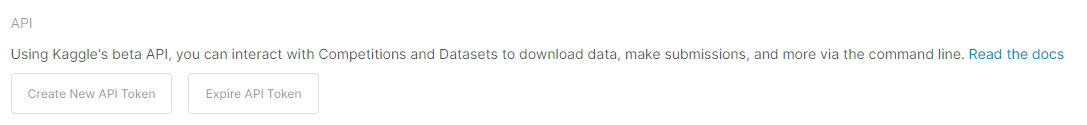

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
import pandas as pd
import numpy as np

# https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=train.csv
# {"username":"adele1997","key":"178dfad8b656a812e88356260d0188b4"}

od.download("https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=train.csv")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: adele1997
Your Kaggle Key: ··········


100%|██████████| 199k/199k [00:00<00:00, 32.1MB/s]


Extracting archive ./house-prices-advanced-regression-techniques/house-prices-advanced-regression-techniques.zip to ./house-prices-advanced-regression-techniques


In [ ]:
import pandas as pd

# df = pd.read_csv('/content/house-prices-advanced-regression-techniques/train.csv')

df = pd.read_csv('/content/house-prices-advanced-regression-techniques/train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [ ]:
df_nan = df.loc[:, df.isnull().any()]
# посмотрим процент пропущенных значений
df_nan.isnull().sum() / len(df_nan) * 100

,0
LotFrontage,17.739726
Alley,93.767123
MasVnrType,59.726027
MasVnrArea,0.547945
BsmtQual,2.534247
BsmtCond,2.534247
BsmtExposure,2.602740
BsmtFinType1,2.534247
BsmtFinType2,2.602740
Electrical,0.068493


Видим, что есть столбцы, в которых более 80% пропусков,такие переменные лучше в целом удалить, так как заполнение может привести в дальнейшем только к ухудшению результата.

Удалим данные переменные (столбцы):

In [ ]:
df = df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'], axis = 1)

Теперь посмотрим на разные способы заполнения пропусков:

Заполним одну из переменных константным значением равным 0.

In [ ]:
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)
# df["MasVnrArea"] = df["MasVnrArea"].replace(np.nan, 0)

Заполним другую переменную, используя среднее значение по всей переменной или медиану:

In [ ]:
#using mean
m = df['LotFrontage'].mean()
df['LotFrontage'].fillna(m, inplace=True)
# using median
# df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)

Заполнение с использованием моды для нечисловых переменных:

In [ ]:
# using mode
df["GarageFinish"].fillna(df["GarageFinish"].mode()[0], inplace=True)

Заполнение, используя предыдущие значения в строке или последующие:

In [ ]:
# using ffill method
df["GarageType"] = df["GarageType"].fillna(method='ffill')
# OR
# using bfill method
df["Electrical"] = df["Electrical"].fillna(method='bfill')

Заполнение с использование методы интерполяции:

In [ ]:
df["GarageYrBlt"].interpolate(method="linear", direction = "forward", inplace=True)

Мы рассмотрели самые простые способы работы с пропусками, но нужно учитывать, что выбор метода обработки пропусков зависит от характера данных, типа задачи и возможного влияния пропусков на результаты анализа. Важно тщательно проанализировать данные, протестировать разные подходы и оценить их влияние на качество модели.